# Logistic Regression 
This given data I download from kaggle(https://www.kaggle.com/code/rishikesh247/suv-prediction/data)
Explore dataset to predict the category of people who might be interested to purchase the newly launched suv in the market

This prediction predict customer will Purchase an suv or not. I'll use Logistic Regression to predict the outcome by Gender,Age and EstimatedSalary. The accuracy score of this prediction is 89.16%

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Suv_data.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


# Preprocessing of Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [4]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


# Exploratory Data Analysis

<AxesSubplot:xlabel='Age', ylabel='count'>

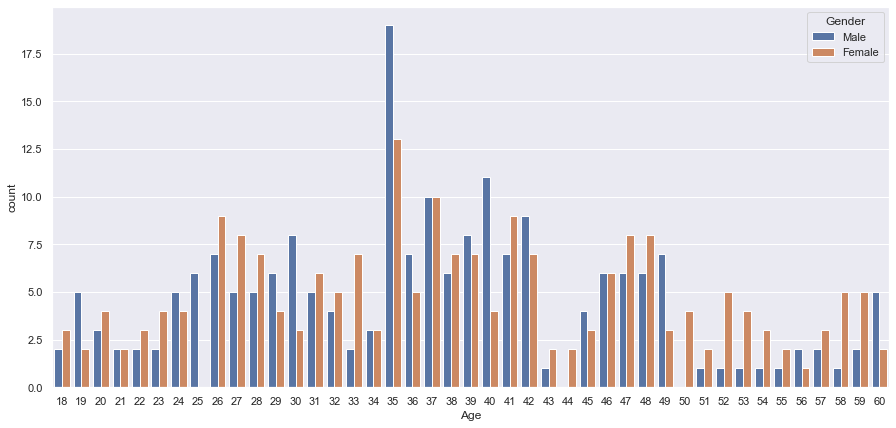

In [5]:
sns.set(rc={'figure.figsize':(15,7)})
sns.countplot(x='Age',hue='Gender',data= df,)

<AxesSubplot:xlabel='Purchased', ylabel='count'>

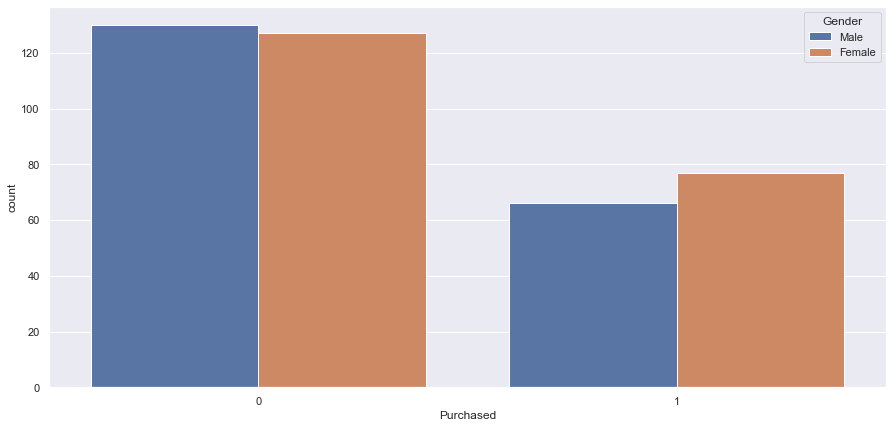

In [6]:
sns.countplot(x='Purchased',hue='Gender',data=df)

In [7]:
print('hightes age: ',df['Age'].max())
print('lowest age: ',df['Age'].min())

hightes age:  60
lowest age:  18


<AxesSubplot:xlabel='Purchased', ylabel='count'>

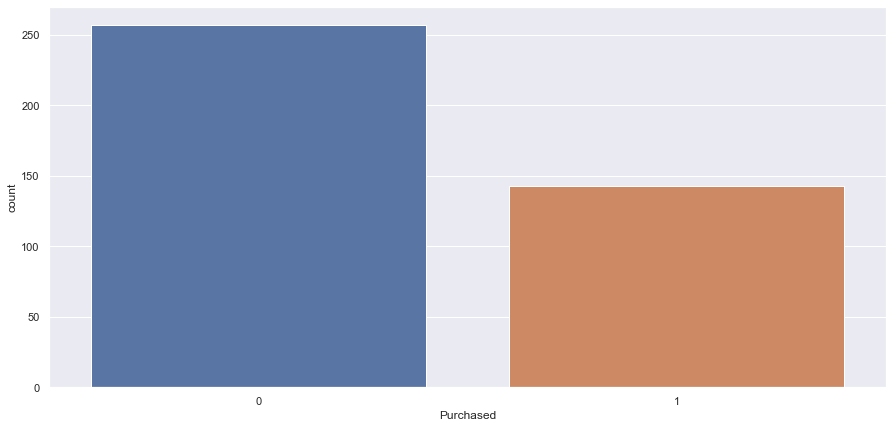

In [8]:
sns.countplot(x='Purchased',data=df)

<AxesSubplot:xlabel='EstimatedSalary', ylabel='Gender'>

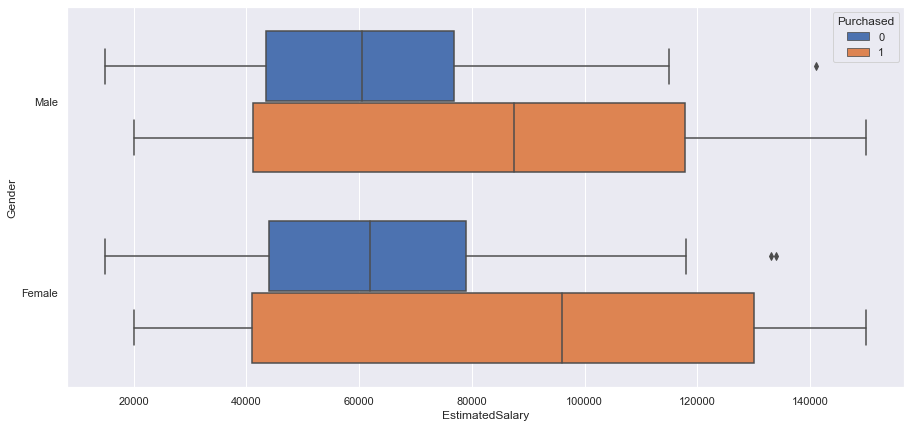

In [9]:
sns.boxplot(x='EstimatedSalary',y='Gender',hue='Purchased',data=df,linewidth=1.5,saturation=1,width=0.75)

<AxesSubplot:ylabel='Frequency'>

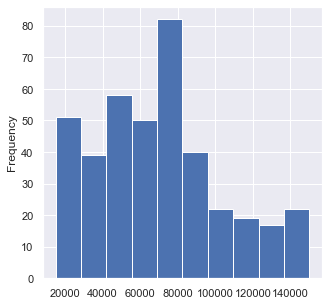

In [10]:
df['EstimatedSalary'].plot.hist(figsize=(5,5))

<AxesSubplot:ylabel='Frequency'>

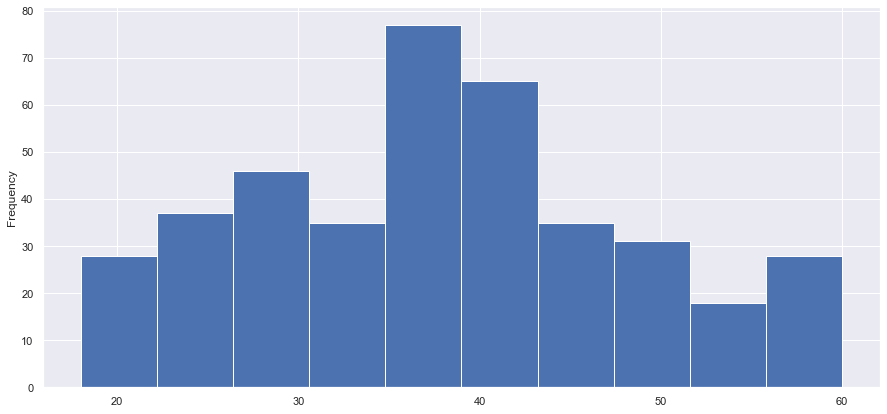

In [11]:
df['Age'].plot.hist()

In [12]:
age_category = []
for i in range(0,len(df['Age'])):
    if df['Age'][i]<=20:
        age_category.append('below 20')
    elif df['Age'][i]<=30:
        age_category.append('21 -30')
    elif df['Age'][i]<=40:
        age_category.append('31-40')
    elif 40 < df ['Age'][i] <= 50:
        age_category.append ('41 - 50')
    elif 50 < df ['Age'][i] <= 60:
        age_category.append ('51 - 60')
    else:
        age_category.append ('61 and above')
print(age_category)


['below 20', '31-40', '21 -30', '21 -30', 'below 20', '21 -30', '21 -30', '31-40', '21 -30', '31-40', '21 -30', '21 -30', 'below 20', '31-40', 'below 20', '21 -30', '41 - 50', '41 - 50', '41 - 50', '41 - 50', '41 - 50', '41 - 50', '41 - 50', '41 - 50', '41 - 50', '41 - 50', '41 - 50', '41 - 50', '21 -30', '31-40', '31-40', '21 -30', '21 -30', '21 -30', '21 -30', '31-40', '31-40', '21 -30', '21 -30', '21 -30', '21 -30', '31-40', '31-40', '21 -30', '21 -30', '21 -30', '21 -30', '21 -30', '21 -30', '31-40', '21 -30', 'below 20', '21 -30', '31-40', '21 -30', '21 -30', '21 -30', '21 -30', '21 -30', '31-40', '21 -30', '21 -30', '21 -30', '31-40', '51 - 60', '21 -30', '21 -30', '21 -30', '21 -30', '31-40', '21 -30', '21 -30', 'below 20', '31-40', '31-40', '31-40', 'below 20', '21 -30', '21 -30', '21 -30', '21 -30', '31-40', 'below 20', '31-40', '21 -30', '31-40', '21 -30', '21 -30', '21 -30', '31-40', '21 -30', '21 -30', '21 -30', '21 -30', '21 -30', '31-40', '31-40', '21 -30', '31-40', '21 -

In [13]:
age_data = pd.DataFrame(data=age_category,columns=['rangeage'])
df = pd.concat([df,age_data],axis=1)
df.head()


,User ID,Gender,Age,EstimatedSalary,Purchased,rangeage
0,15624510,Male,19,19000,0,below 20
1,15810944,Male,35,20000,0,31-40
2,15668575,Female,26,43000,0,21 -30
3,15603246,Female,27,57000,0,21 -30
4,15804002,Male,19,76000,0,below 20


In [14]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
rangeage           0
dtype: int64

In [15]:
df.drop(['User ID'],axis=1,inplace=True)
df

,Gender,Age,EstimatedSalary,Purchased,rangeage
0,Male,19,19000,0,below 20
1,Male,35,20000,0,31-40
2,Female,26,43000,0,21 -30
3,Female,27,57000,0,21 -30
4,Male,19,76000,0,below 20
...,...,...,...,...,...
395,Female,46,41000,1,41 - 50
396,Male,51,23000,1,51 - 60
397,Female,50,20000,1,41 - 50
398,Male,36,33000,0,31-40


In [16]:
df.head()

,Gender,Age,EstimatedSalary,Purchased,rangeage
0,Male,19,19000,0,below 20
1,Male,35,20000,0,31-40
2,Female,26,43000,0,21 -30
3,Female,27,57000,0,21 -30
4,Male,19,76000,0,below 20


<AxesSubplot:xlabel='rangeage', ylabel='count'>

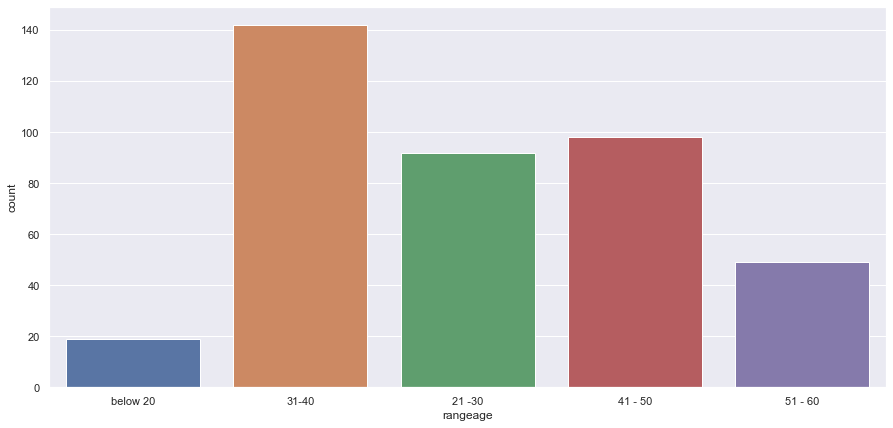

In [17]:
sns.countplot(x='rangeage',data=df)

In [18]:
print('max is :',df['EstimatedSalary'].max())
print('min is :',df['EstimatedSalary'].min())

max is : 150000
min is : 15000


<AxesSubplot:>

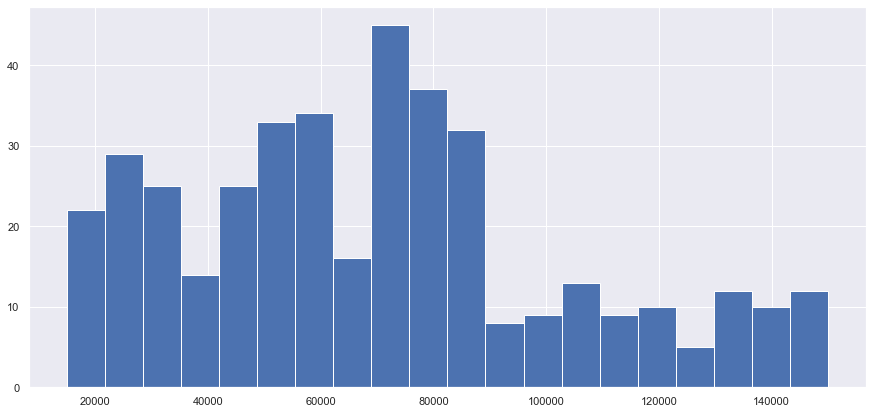

In [19]:
df['EstimatedSalary'].hist(bins=20)

In [20]:
df2 = df.copy()
bins = [0,40000,80000,120000]
labels =["Low Salary", "Medium Salary", "High Salary"]
df2['salaryrange'] = pd.cut(df2['EstimatedSalary'],bins,labels=labels)
df2.head()

,Gender,Age,EstimatedSalary,Purchased,rangeage,salaryrange
0,Male,19,19000,0,below 20,Low Salary
1,Male,35,20000,0,31-40,Low Salary
2,Female,26,43000,0,21 -30,Medium Salary
3,Female,27,57000,0,21 -30,Medium Salary
4,Male,19,76000,0,below 20,Medium Salary


<AxesSubplot:xlabel='salaryrange', ylabel='count'>

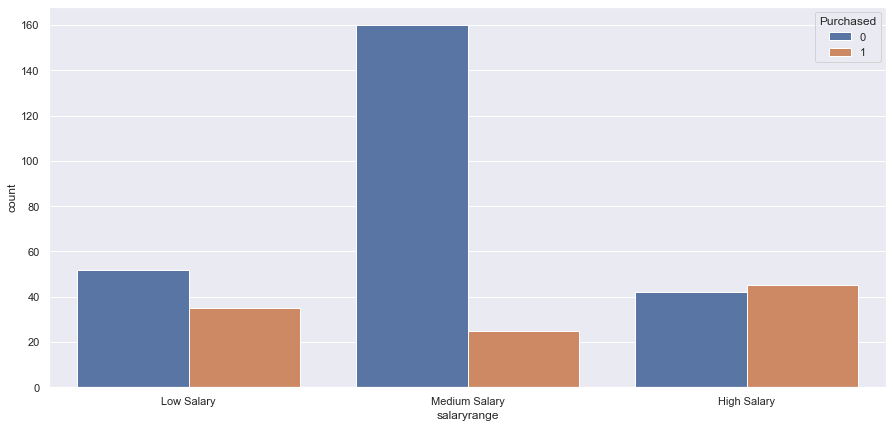

In [21]:
sns.countplot(x='salaryrange',hue='Purchased',data=df2)


In [22]:
gend = pd.get_dummies(df2['Gender'],drop_first=True)
gend.head()

,Male
0,1
1,1
2,0
3,0
4,1


In [23]:
sala = pd.get_dummies(df2['salaryrange'],drop_first=True)
sala.head()

,Medium Salary,High Salary
0,0,0
1,0,0
2,1,0
3,1,0
4,1,0


In [24]:
finaldata = pd.concat([df2,gend,sala],axis=1)
finaldata.head()

,Gender,Age,EstimatedSalary,Purchased,rangeage,salaryrange,Male,Medium Salary,High Salary
0,Male,19,19000,0,below 20,Low Salary,1,0,0
1,Male,35,20000,0,31-40,Low Salary,1,0,0
2,Female,26,43000,0,21 -30,Medium Salary,0,1,0
3,Female,27,57000,0,21 -30,Medium Salary,0,1,0
4,Male,19,76000,0,below 20,Medium Salary,1,1,0


In [25]:
finaldata = finaldata.drop(['Gender','EstimatedSalary','salaryrange','rangeage'],axis=1)
finaldata.head()

,Age,Purchased,Male,Medium Salary,High Salary
0,19,0,1,0,0
1,35,0,1,0,0
2,26,0,0,1,0
3,27,0,0,1,0
4,19,0,1,1,0


In [26]:
X = finaldata.drop('Purchased',axis=1)
y = finaldata['Purchased']

In [27]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [29]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [30]:
pred = model.predict(X_test)

In [31]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [32]:
accuracy_score(y_test,pred)*100

89.16666666666667

In [33]:
cm = confusion_matrix(y_test,pred)

<AxesSubplot:>

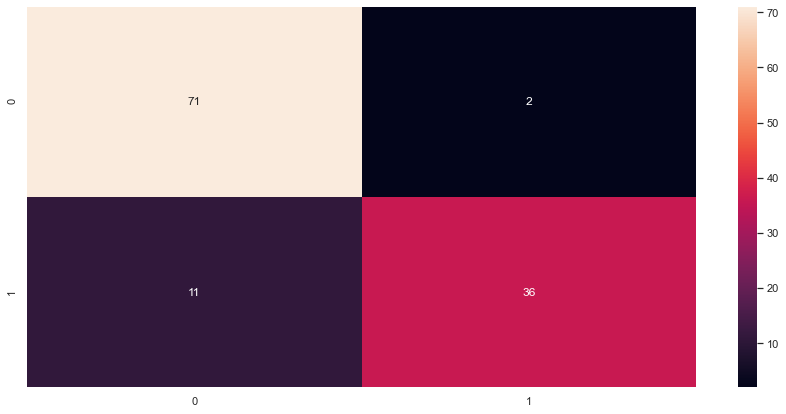

In [34]:
sns.heatmap(cm,annot=True)